##Importing Libraries


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.preprocessing.image import img_to_array, load_img # type: ignore
from tensorflow.keras.optimizers import RMSprop, Adam # type: ignore
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

#Training Image processing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5005 files belonging to 25 classes.


#Validation

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5005 files belonging to 25 classes.


# Building the model

# Convolutional layer

In [ ]:
iou_metric = tf.keras.metrics.MeanIoU(num_classes=25)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape = (64, 64, 3)),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(25, activation = 'sigmoid')
                                    ])

#Compiling

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy', 'mae', iou_metric])

In [ ]:
#training_hist = model.fit(training_set,
 #                     epochs = 10,
  #                    validation_data = validation_set)
training_hist = model.fit(training_set,
                      epochs = 100,
                      validation_data = validation_set,
                      callbacks=[early_stopping])

Epoch 1/100
157/157 [==============================] - 3637s 23s/step - loss: 0.7501 - accuracy: 0.1339 - mae: 0.1230 - mean_io_u: 0.4803 - val_loss: 0.1349 - val_accuracy: 0.3548 - val_mae: 0.0551 - val_mean_io_u: 0.4800
Epoch 2/100
157/157 [==============================] - 139s 876ms/step - loss: 0.1424 - accuracy: 0.3692 - mae: 0.0693 - mean_io_u: 0.4804 - val_loss: 0.0899 - val_accuracy: 0.5840 - val_mae: 0.0542 - val_mean_io_u: 0.4800
Epoch 3/100
157/157 [==============================] - 136s 859ms/step - loss: 0.0893 - accuracy: 0.5896 - mae: 0.0462 - mean_io_u: 0.4803 - val_loss: 0.0506 - val_accuracy: 0.7782 - val_mae: 0.0278 - val_mean_io_u: 0.4805
Epoch 4/100
157/157 [==============================] - 139s 878ms/step - loss: 0.0609 - accuracy: 0.7369 - mae: 0.0317 - mean_io_u: 0.4825 - val_loss: 0.0439 - val_accuracy: 0.8198 - val_mae: 0.0206 - val_mean_io_u: 0.4820
Epoch 5/100
157/157 [==============================] - 139s 877ms/step - loss: 0.0435 - accuracy: 0.8344 - ma

In [ ]:
save_path = '/content/drive/Shareddrives/DS 3 - Research/Finals_copy.h5'

# Save the model
model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_hist.history

{'loss': [0.7500935792922974,
  0.14235423505306244,
  0.08928172290325165,
  0.060913048684597015,
  0.04349730908870697,
  0.028235238045454025,
  0.020374422892928123,
  0.014401987195014954,
  0.011255329474806786,
  0.00962078757584095,
  0.01044430024921894,
  0.008542239665985107,
  0.007785758934915066,
  0.008634920231997967,
  0.006971742957830429,
  0.007674935273826122,
  0.0077452934347093105],
 'accuracy': [0.13386613130569458,
  0.3692307770252228,
  0.5896103978157043,
  0.7368631362915039,
  0.8343656063079834,
  0.8975024819374084,
  0.932467520236969,
  0.959240734577179,
  0.9702297449111938,
  0.9772228002548218,
  0.9728271961212158,
  0.9808191657066345,
  0.9818181991577148,
  0.982017993927002,
  0.9846153855323792,
  0.9852147698402405,
  0.986613392829895],
 'mae': [0.12298455834388733,
  0.06931738555431366,
  0.046226661652326584,
  0.03168429061770439,
  0.02207006886601448,
  0.014239906333386898,
  0.009747730568051338,
  0.006597317289561033,
  0.005138

In [ ]:
import json
with open('training_hist3.json','w') as f:
  json.dump(training_hist.history,f)

In [ ]:
print(training_hist.history.keys())

dict_keys(['loss', 'accuracy', 'mae', 'mean_io_u', 'val_loss', 'val_accuracy', 'val_mae', 'val_mean_io_u'])


#Calculating Accuracy of Model Achieved on Validation Set


In [ ]:
print('Validation accuracy: {} %'.format(training_hist.history['val_accuracy'][-1]*100))

Validation accuracy: 99.76024031639099 %


# Training accuracy

Text(0.5, 1.0, 'Training accuracy result.')

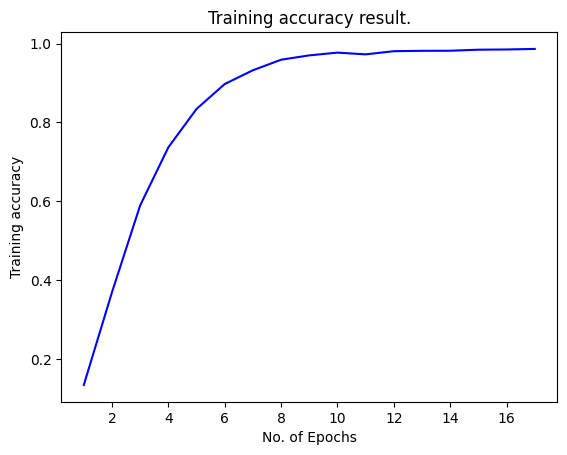

In [ ]:
epochs = [i for i in range (1,18)]
plt.plot(epochs,training_hist.history['accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Training accuracy')
plt.title('Training accuracy result.')

#Validation accuracy

Text(0.5, 1.0, 'Validation Accuracy result.')

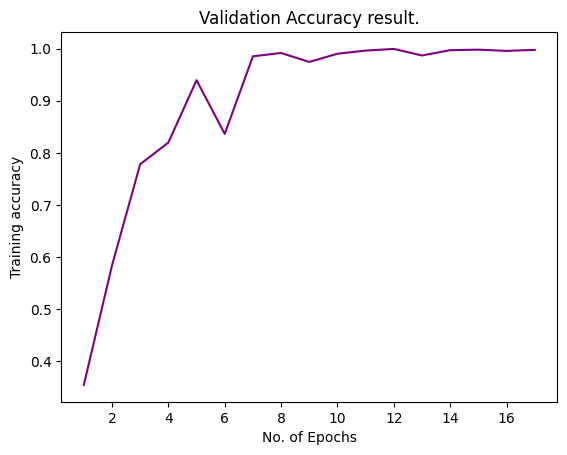

In [ ]:
plt.plot(epochs,training_hist.history['val_accuracy'],color='purple')
plt.xlabel('No. of Epochs')
plt.ylabel('Training accuracy')
plt.title('Validation Accuracy result.')

In [ ]:
while True:pass

In [ ]:
model = tf.keras.models.load_model('/content/drive/Shareddrives/DS 3 - Research/trained_model3.h5')

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1260 files belonging to 25 classes.


1/1 [==============================] - 0s 36ms/step


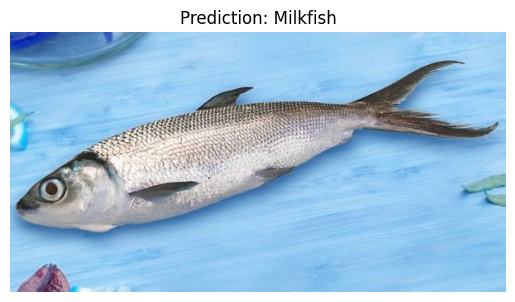

1/1 [==============================] - 0s 40ms/step


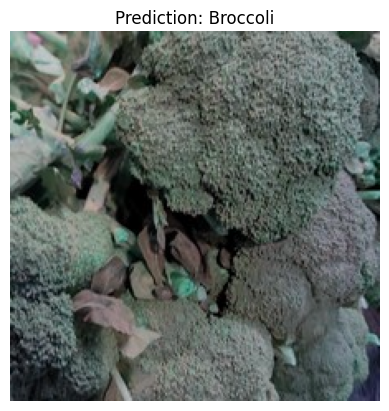

1/1 [==============================] - 0s 42ms/step


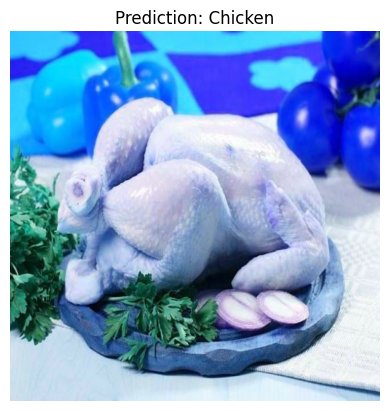

1/1 [==============================] - 0s 26ms/step


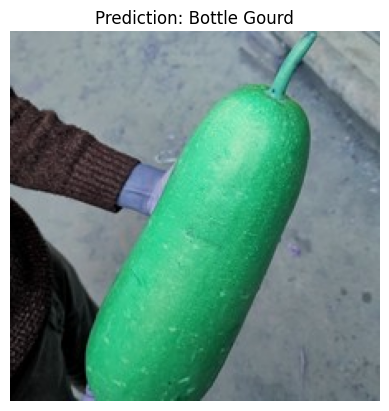

In [ ]:
# Define a function to predict multiple images
def predict_multiple_images(model, image_paths, class_names):
    predictions = []
    for image_path in image_paths:
        img = cv2.imread(image_path)
        # Load and preprocess the image
        image = load_img(image_path, target_size=(64, 64))
        input_arr = img_to_array(image)
        input_arr = np.expand_dims(input_arr, axis=0)
        # Predict the output
        prediction = model.predict(input_arr)
        predicted_class_index = np.argmax(prediction, axis=-1)[0]
        predicted_class_name = class_names[predicted_class_index]
        predictions.append(predicted_class_name)
        # Display the image and its prediction
        plt.figure()
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_class_name}")
        plt.axis('off')
        plt.show()
    return predictions

# List of image paths
image_paths = [
    "/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Test/Milkfish/1000x1000Milkfish4-600x315_jpg.rf.da643c7bc121638073c793e528f2373a.jpg", '/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Test/Broccoli/0201.jpg',
    '/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Test/Chicken/00000014_jpg.rf.da1cd9a4c6a114e9c66af44609d7c218.jpg','/content/drive/Shareddrives/DS 3 - Research/Recipe Recommendation/Test/Bottle Gourd/0017.jpg']

# List of class names
class_names = test_set.class_names

# Call the function to predict multiple images
predictions = predict_multiple_images(model, image_paths, class_names)